# Example: Simulation of the acid-base changes in an amino-acid solution

Here we make a simple simulation of the changes in pH and charge distribution of an amino acid in solution.

Focus will be on Glycine first, but the derivarion and the analysis can easily be applied to the other amino acids if the values of the pKa are known.


## Derivation of the relevant equations

We first seek to calculate the charge distribution of glycine in solution as a function of pH.

At any pH, we can find glycine as a mixture of three species:

$NH^{+}_3 - CH_2 - COOH$ the positive form, here represented by $G^+$.

$NH_2 - CH_2 - COOH$ the neutral form, here represented by $G^0$.

$NH_2 - CH_2 - COO^{-}$ the negative form, here represented by $G^-$.


Total of different forms is constant:

$G^+ + G^0 + G^- = G_{tot}$

There are two equilibria

$pH = pK1 + log_{10} \left( \frac{G^0}{G^+} \right)$

$pH = pK2 + log_{10} \left( \frac{G^-}{G^0} \right)$


We need to calculate all the forms of the amino acid as a function of pH.

Let's make

$f1 = \frac{G^0}{G^+}$ and $f2 = \frac{G^-}{G^0}$

Then

$f1 = 10^{pH - pK1}$ and $f2 = 10^{pH - pK2}$

Now, using these in the total amino acid conservation equation,

$G^+ + G^+ f1 + G^+ f1 f2 = G_{tot}$

or

$G^+ = \frac{G_{tot}}{1 + f1 + f1f2}$

And, by definition of $f1$ and $f2$, 

$G^0 = G^+ f1$

$G^- = G^0 f2$

The sequence of calculations is then

$pH \longrightarrow f1, f2 \longrightarrow G^+ \longrightarrow G^0 \longrightarrow G^-$

An additional problem is the calculation of the amount of $OH^-$ than must be used to drive the solution to a given pH, statrting from a very low pH solution

This is simply

$nOH^- = nG^0 + 2 nG^-$

## Analysis

### Computation

Make the necessary imports

In [1]:
from numpy import linspace

Use derived equations to compute species distribution and the amount of base necessary to change the solution into a given pH value.

In [2]:
pK1 = 2.3
pK2 = 9.6
Gt  = 0.1 # M

pH = linspace(0, 14, 14000)
f1 = 10.0**(pH - pK1)
f2 = 10.0**(pH - pK2)

Gplus = Gt / (1 + f1 + f1*f2)
Gzero = f1 * Gplus
Gminus = f2 * Gzero
nOH = Gzero + 2 * Gminus

### Plots

Obtain a plot of the distribution of the three different species of the amino acid as a function of pH.

In [3]:
%matplotlib inline 
# This is to be used in IPython/Jupyter notebooks
# This makes plots appear "inline" as part of cell's outputs.

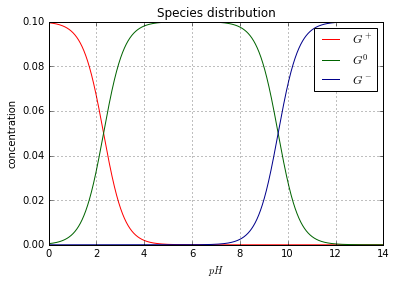

In [4]:
import matplotlib.pyplot as pl

pl.plot(pH, Gplus, 'r-')
pl.plot(pH, Gzero, color='darkgreen')
pl.plot(pH, Gminus, color='darkblue')

pl.ylabel('concentration')
pl.xlabel('$pH$')
pl.legend(('$G^+$','$G^0$', '$G^-$'))
pl.title('Species distribution')
pl.grid()

Plot also the amount of base necessary to change the pH of the solution, but **exchange the x and y axis**, so that it looks like we are titulating the solution.

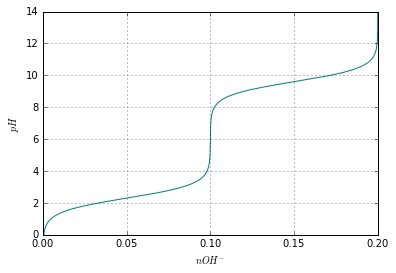

In [5]:
pl.plot(nOH, pH, color='teal')

pl.ylabel('$pH$')
pl.xlabel('$nOH^{-}$')
pl.grid()